# An Introduction to Combining Data with Pandas' `merge`, `join`, and `concat`

This notebook contains code examples to use with the article of the same name, along with light commentary on each of the examples.


We have 2 datasets from SQL BD:

1.   Climate normals for California (temperatures) - climate_temp.csv
2.   Climate normals for California (precipitation) - climate_precip.csv

These two datasets are from the National Oceanic and Atmospheric Administration (NOAA) and were derived from the[ NOAA public data repository](https://www.ncdc.noaa.gov/cdo-web/).


In [ ]:
import pandas as pd
import numpy as np
import sqlite3

pd.set_option("display.max_columns", 50)

# Import Data

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/a8hzcdgkggln7fgpddeof/climate_database.db?rlkey=i3gqf28n3qfbncxf4dm3epk5i&dl=0' -O climate_database.db

In [ ]:
conn = sqlite3.connect('climate_database.db') # Создание подключение к БД SQL

In [ ]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") # Запрос содержимого БД для всего, что является таблицей
table_names = cursor.fetchall()
table_names

[('climate_temp',), ('climate_precip',)]

In [ ]:
query = "SELECT * FROM climate_temp" # форма запроса конкретной таблицы
climate_temp = pd.read_sql_query(query, conn) # Чтение таблицы

query = "SELECT * FROM climate_precip"
climate_precip = pd.read_sql_query(query, conn)

conn.close() # Отключение от БД

Запись в БД новой таблицы или обновление существующей выглядит так



```
conn = sqlite3.connect('climate_database.db')
new_dataset.to_sql(name='new_table', con=conn, index=False, if_exists='replace') # pandas method
conn.close()
```



Here you will import the temperature and precipitation climate normals datasets into DataFrames. Calling `.head()` on the DataFrame will give you a 5 row preview of your data, and the `shape` attribute will give you the dimensions of the data in the form `(rows, columns)`. These are great sanity checks to run before doing too much with the data.

In [ ]:
climate_temp.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15


In [ ]:
climate_temp.shape

(127020, 21)

In [ ]:
climate_precip.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101.0,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.02,0.0,0.02,0.0,98.0,43.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102.0,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.04,0.0,0.04,0.0,99.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103.0,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.05,0.0,0.05,0.0,100.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.07,0.0,0.07,0.0,101.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.09,0.0,0.09,0.0,102.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
climate_precip.shape

(100748, 29)

# Pandas Merge

Параметры функции `pandas.merge()` используются для настройки операции объединения (merge) двух DataFrame в Pandas. Вот основные параметры, которые можно указать при использовании merge():


* `left`: Левый DataFrame, который будет использоваться для объединения.
* `right`: Правый DataFrame, с которым будет производиться объединение.
* `how`: Определяет тип объединения. Возможные значения: 'inner' (внутреннее объединение), 'outer' (внешнее объединение), 'left' (левое объединение), 'right' (правое объединение). Значение по умолчанию - 'inner'.
* `on`: Столбец или список столбцов, по которым будет производиться объединение. Если не указан, используются все общие столбцы с одинаковыми именами в обоих DataFrame.
* `left_on` и `right_on`: Столбцы или списки столбцов в левом и правом DataFrame соответственно, по которым будет производиться объединение, если имена столбцов отличаются.
* `left_index` и `right_index`: Логические значения, указывающие, следует ли использовать индексы левого и/или правого DataFrame для объединения вместо столбцов.
* `suffixes`: Список суффиксов, которые будут добавлены к именам столбцов, если имена столбцов в левом и правом DataFrame конфликтуют. По умолчанию используются суффиксы '_x' и '_y'.
* `sort`: Логическое значение, указывающее, следует ли сортировать объединенный DataFrame по столбцам. Значение по умолчанию - False.

## How

* **inner** (по умолчанию): включает только те строки, для которых значения в сопоставляемых столбцах или индексах обоих DataFrame совпадают.
* **left**: включает все строки из левого (первого) DataFrame и только совпадающие строки из правого (второго) DataFrame. Если значения в сопоставляемых столбцах или индексах не совпадают, то для правого DataFrame будут добавлены значения NaN.
* **right**: включает все строки из правого (второго) DataFrame и только совпадающие строки из левого (первого) DataFrame. Если значения в сопоставляемых столбцах или индексах не совпадают, то для левого DataFrame будут добавлены значения NaN.
* **outer**: включает все строки из обоих DataFrame и заполняет значениями NaN для неподходящих сопоставлений.


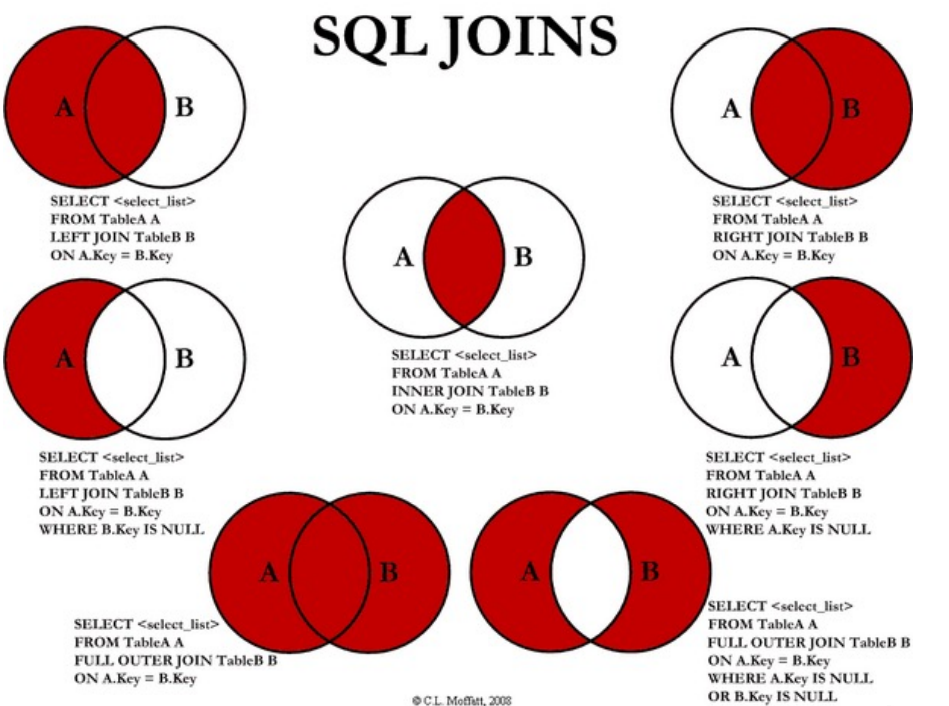

In [ ]:
# SIMPLE EXAMPLE

df1 = pd.DataFrame({'key': ['foo', 'bar', 'baz', 'dd'],
                    'value': [1, 2, 3, 5],
                    'moped': [11, 13, 14, 16]})

df2 = pd.DataFrame({'key': ['foo', 'bar', 'ss', 'hh'],
                    'value': [5, 6, 7, 8],
                    'samokat': [11, 13, 51, 61]})

df1, df2

(   key  value  moped
 0  foo      1     11
 1  bar      2     13
 2  baz      3     14
 3  foo      5     16,
    key  value  samokat
 0  foo      5       11
 1  bar      6       13
 2  baz      7       51
 3  foo      8       61)

Попробуйте разные варианты объединения!

In [ ]:
pd.merge(df1, df2)

,key,value,moped,samokat
0,foo,5,16,11


## Inner Join

Here, you will use a plain `merge()` call to do an inner join and learn how this can result in a smaller, more focused dataset. First, you will create a new DataFrame object that contains the precipitation data from one station.

In [ ]:
# CSV EXAMPLE

precip_one_station = climate_precip.query("STATION == 'GHCND:USC00045721'")
precip_one_station.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999


In [ ]:
precip_one_station.shape

(365, 29)


Опреация пересечения множеств:

```
intersection = set1 & set2
```
В результирующее множество войдут только те элементы, которые присутствуют в обоих исходных множествах.

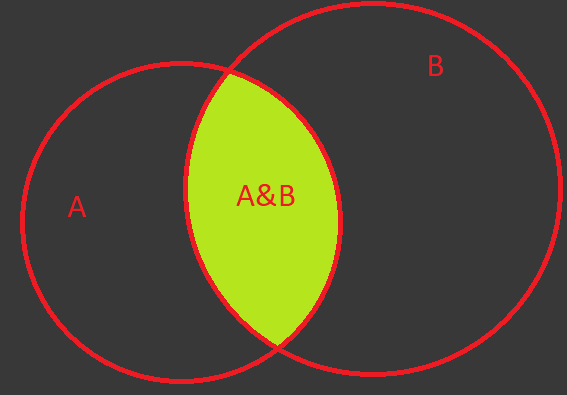


In [ ]:
set(precip_one_station.columns) & set(climate_temp)

{'DATE', 'STATION', 'STATION_NAME'}

In [ ]:
inner_merged = pd.merge(precip_one_station, climate_temp)
inner_merged.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19


How many rows do you think this merged DataFrame has?

In [ ]:
inner_merged.shape

(365, 47)

You get 365 rows because any non-matching rows are discarded in an inner join, which is the default merge method for a `merge()` call, and `precip_one_station` had only 365 rows.

What if you want to merge both full datasets, but specify which columns to join on? In this case, you will use the `on` parameter:

In [ ]:
inner_merged_total = pd.merge(
    climate_temp, climate_precip, on=["STATION", "DATE"]
)
inner_merged_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_NAME_y,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


In [ ]:
inner_merged_total.shape

(123005, 48)

You can specify a single _key column_ with a string, or multiple key columns with a list, as in the above example. This results in a DataFrame with 123005 rows and 48 columns.

Why 48 columns instead of 47? Because you specified the keys columns to join on, Pandas doesn't try to merge all mergeable columns. This can result in "duplicate" column names, which may or may not have different values. "Duplicate" is in quotes because the columns will actually have new names, by default they are appended with `_x` and `_y`. You can also use the `suffixes` parameter to control what is appended to the column names.

### Outer Join
With the outer join, you will retain rows that don't have matches as well. For this example, you will use the smaller precipitation DataFrame `precip_one_station` with the full `climate_temp` DataFrame and join with `STATION` and `DATE` columns as the key columns. Take a second and think about how many rows you expect the new DataFrame to have.

In [ ]:
outer_merged = pd.merge(
    precip_one_station, climate_temp, how="outer", on=["STATION", "DATE"]
)
outer_merged.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_NAME_y,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666.0,-66.6,0.16,-666.0,-66.6,0.44,-666.0,-66.6,0.04,0.0,0.04,0.0,137.0,81.0,31.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,-9999.0,-9999.0,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.44,-666.0,-66.6,0.08,0.0,0.08,0.0,138.0,83.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.45,-666.0,-66.6,0.12,0.0,0.12,0.0,139.0,84.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.45,-666.0,-66.6,0.16,0.0,0.16,0.0,140.0,85.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666.0,-66.6,0.17,-666.0,-66.6,0.46,-666.0,-66.6,0.21,0.0,0.21,0.0,141.0,86.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19


In [ ]:
outer_merged.sample(10)

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_NAME_y,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
80624,GHCND:USC00041700,NaN,20101121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHESTER CA US,1380.7,40.3033,-121.2422,-7777,-7777,0,0,0,0,0,0,5,9,14,19,21,24,29
112234,GHCND:USC00045360,NaN,20100629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MARKLEY COVE CA US,146.3,38.4916,-122.1241,28,23,18,16,13,9,4,3,0,0,0,0,0,-7777,-7777
82183,GHCND:USC00049785,NaN,20100228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOODLAND HILLS PIERCE COLLEGE CA US,240.8,34.18194,-118.57444,11,6,3,2,1,-7777,-7777,0,0,0,-7777,1,2,4,9
9906,GHCND:USC00042598,NaN,20100221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EAGLE MOUNTAIN CA US,296.6,33.8089,-115.4508,15,10,5,4,2,1,-7777,-7777,-7777,-7777,-7777,1,1,3,6
64077,GHCND:USC00043647,NaN,20100722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GRIZZLY CREEK STATE CA US,125.9,40.4863,-123.9088,19,14,9,7,4,1,-7777,-7777,0,0,0,-7777,-7777,-7777,2
111056,GHCND:USC00049822,NaN,20100407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WRIGHTWOOD CA US,1828.8,34.3617,-117.6386,3,1,-7777,-7777,-7777,0,0,0,2,4,7,11,13,16,21
69578,GHCND:USC00046926,NaN,20100817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PINNACLES NM CA US,398.4,36.48167,-121.18222,25,20,15,13,10,5,2,1,0,0,0,-7777,-7777,-7777,-7777
27301,GHCND:USW00023230,NaN,20101019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OAKLAND METROPOLITAN CA US,1.8,37.72139,-122.22083,15,10,5,3,2,-7777,-7777,-7777,0,0,0,-7777,-7777,1,5
83538,GHCND:USC00041715,NaN,20101115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHICO UNIVERSITY FARM CA US,56.4,39.69111,-121.82111,8,4,1,1,-7777,-7777,0,0,-7777,-7777,1,4,5,8,13
68965,GHCND:USC00044500,NaN,20101212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENTFIELD CA US,44.2,37.95694,-122.54389,4,1,-7777,-7777,0,0,0,0,-7777,1,3,7,9,12,17


In [ ]:
outer_merged.shape

(127020, 48)

If you remember from when you checked the `.shape` attribute of `climate_temp`, you'll see that the number of rows in `outer_merged` matches that. With an outer join, you can expect to have the same number of rows as the larger DataFrame, since none are lost like they are in an inner join.

### Left Join
Also known as a left outer join. In this join, you will retain rows that don't have matches only on the left (or first) DataFrame to be merged.

In [ ]:
left_merged = pd.merge(
    climate_temp, precip_one_station, how="left", on=["STATION", "DATE"]
)
left_merged.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_NAME_y,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
left_merged.shape

(127020, 48)

Here, you see that the number of rows in the resulting DataFrame matches that of the rows in the `climate_temp` DataFrame. What if we switched the positions of the two DataFrames that we are merging?

In [ ]:
left_merged_reversed = pd.merge(
    precip_one_station, climate_temp, how="left", on=["STATION", "DATE"]
)
left_merged_reversed.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_NAME_y,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19


In [ ]:
left_merged_reversed.shape

(365, 48)

### Right Join
This works the same as the left join, however non-matching rows are only retained in the _right_ DataFrame. In the next example, you will recreate the `left_merged` DataFrame but with a right join.

In [ ]:
right_merged = pd.merge(
    precip_one_station, climate_temp, how="right", on=["STATION", "DATE"]
)
right_merged.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_NAME_y,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,NaN,20100101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,NaN,20100102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,NaN,20100103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,NaN,20100104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,NaN,20100105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15


In [ ]:
right_merged.shape

(127020, 48)

Here, you simply flipped the positions of the input DataFrames and specified a right join. When you inspect `right_merged`, you might notice that it's not exactly the same as `left_merged`. The only difference between the two is the order of the columns: the first input's columns will always be the first in the newly formed DataFrame.

## .join()
`.join()` uses `merge()` under the hood, but provides a much more simplified interface to `merge()` and by default joins on indexes. Here is an introductory example using the `lsuffix` and `rsuffix` parameters to handle overlapping column names.

In [ ]:
precip_one_station.join(climate_temp, lsuffix="_left", rsuffix="_right")

,STATION_left,STATION_NAME_left,DATE_left,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_right,STATION_NAME_right,ELEVATION,LATITUDE,LONGITUDE,DATE_right,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100101,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,12,14,19
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100102,3,1,-7777,-7777,-7777,0,0,0,1,3,6,10,11,14,19
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100103,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100104,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100105,3,1,-7777,-7777,-7777,0,0,0,1,2,5,9,11,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101227,0.04,-666,-66.6,0.15,-666,-66.6,0.44,-666,-66.6,1.14,0.3,11.29,1.5,132,76,30,12,4,0,3,3,9,6,0,2,2,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20101227,3,1,-7777,-7777,-7777,-7777,0,0,1,3,6,10,12,15,20
1821,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101228,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666,-66.6,1.19,0.3,11.34,1.5,133,77,30,12,4,0,3,3,9,6,0,2,2,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20101228,3,1,-7777,-7777,-7777,-7777,0,0,1,3,6,10,12,15,20
1822,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101229,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666,-66.6,1.24,0.3,11.39,1.5,133,78,30,11,4,0,3,3,9,6,0,2,2,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20101229,3,1,-7777,-7777,-7777,-7777,0,0,1,3,6,10,12,15,20
1823,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101230,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666,-66.6,1.30,0.3,11.45,1.5,134,79,30,11,4,0,3,3,9,6,0,2,2,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20101230,3,1,-7777,-7777,-7777,-7777,0,0,1,3,6,10,12,15,20


If you inspect the data, you'll see that overlapping columns are kept, just renamed to be unique. If we flip this around and instead call `.join()` on the larger DataFrame, you'll notice that the DataFrame is larger, but data that doesn't exist in the smaller DataFrame (`precip_one_station`) is filled in with `NaN` (_Not a Number_) values.

In [ ]:
climate_temp.join(precip_one_station, lsuffix="_left", rsuffix="_right")

,STATION_left,STATION_NAME_left,ELEVATION,LATITUDE,LONGITUDE,DATE_left,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_right,STATION_NAME_right,DATE_right,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127015,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101227,4,2,1,-7777,-7777,-7777,0,0,2,4,6,10,12,15,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127016,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101228,4,2,1,-7777,-7777,-7777,0,0,2,3,6,10,12,15,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127017,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101229,4,2,1,-7777,-7777,-7777,0,0,2,3,6,10,12,15,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127018,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101230,4,2,1,-7777,-7777,-7777,0,0,2,3,6,10,12,15,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If you must use `.join()` and want to merge the columns, you must set them to be indexes first. First take a look at this previously used `merge()` operation:

In [ ]:
inner_merged_total = pd.merge(
    climate_temp, climate_precip, on=["STATION", "DATE"]
)
inner_merged_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_NAME_y,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


In [ ]:
inner_joined_total = climate_temp.join(
    climate_precip.set_index(["STATION", "DATE"]),
    on=["STATION", "DATE"],
    how="inner",
    lsuffix="_x",
    rsuffix="_y",
)
inner_joined_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_NAME_y,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,TWENTYNINE PALMS CA US,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


Because `.join()` works on indexes, if we want to recreate `merge()` before, then we must set indexes on the join columns we specify. In this example, you used the `.set_index()` method to set your indexes to the key columns within the join.

Below you will see an almost-bare `.join()` call. Because there are overlapping columns, you will have to specify a suffix with `lsuffix`, `rsuffix`, or both, but this example will demonstrate the more typical behavior of `.join()`.

In [ ]:
climate_temp.join(climate_precip, lsuffix="_left")

,STATION_left,STATION_NAME_left,ELEVATION,LATITUDE,LONGITUDE,DATE_left,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127015,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101227,4,2,1,-7777,-7777,-7777,0,0,2,4,6,10,12,15,20,GHCND:USC00047874,SAN PASQUAL ANIMAL PARK CA US,20101227,0.06,-9999,-9999.0,0.20,-9999,-9999.0,0.45,-9999,-9999.0,1.78,0.0,13.71,0.0,210,137,45,15,0,0,0,0,0,0,0,0,0
127016,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101228,4,2,1,-7777,-7777,-7777,0,0,2,3,6,10,12,15,20,GHCND:USC00047874,SAN PASQUAL ANIMAL PARK CA US,20101228,0.06,-9999,-9999.0,0.20,-9999,-9999.0,0.45,-9999,-9999.0,1.85,0.0,13.78,0.0,210,137,46,15,0,0,0,0,0,0,0,0,0
127017,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101229,4,2,1,-7777,-7777,-7777,0,0,2,3,6,10,12,15,19,GHCND:USC00047874,SAN PASQUAL ANIMAL PARK CA US,20101229,0.06,-9999,-9999.0,0.20,-9999,-9999.0,0.46,-9999,-9999.0,1.93,0.0,13.86,0.0,210,137,47,16,0,0,0,0,0,0,0,0,0
127018,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101230,4,2,1,-7777,-7777,-7777,0,0,2,3,6,10,12,15,19,GHCND:USC00047874,SAN PASQUAL ANIMAL PARK CA US,20101230,0.06,-9999,-9999.0,0.20,-9999,-9999.0,0.47,-9999,-9999.0,2.01,0.0,13.94,0.0,210,137,48,16,0,0,0,0,0,0,0,0,0


## concat()

First, you will see a basic concatenation along axis 0.

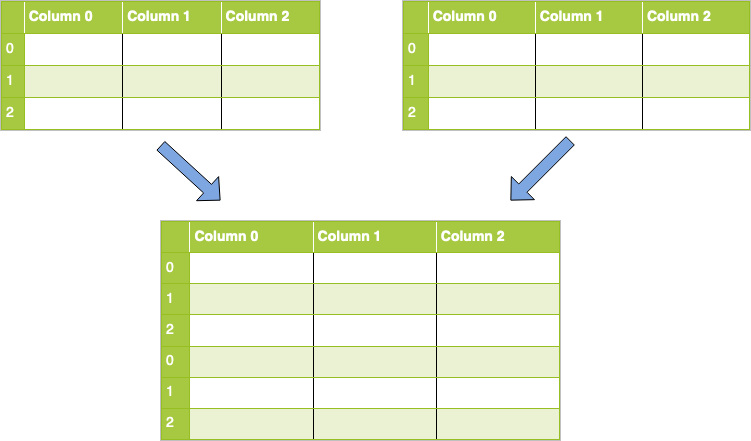

*Note: This example assumes that your column names are the same. If your column names are different while concatenating along rows (axis 0), then by default the columns will also be added, and NaN values will be filled in as applicable.*

*What if you wanted to perform a concatenation along columns instead? First, take a look at a visual representation of this operation:*

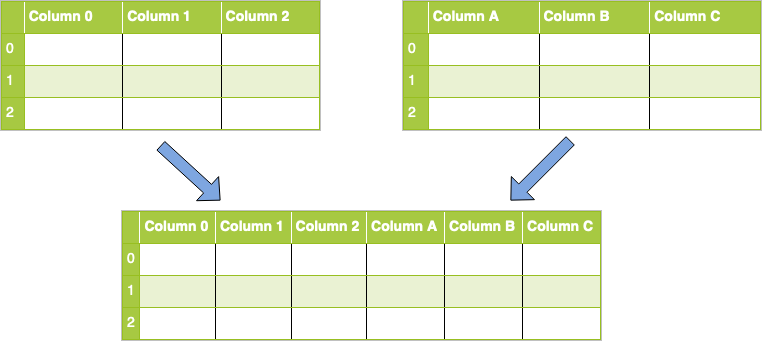

In [ ]:
double_precip = pd.concat([precip_one_station, precip_one_station])
double_precip.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999


To reset the index, use the `ignore_index` optional parameter.

In [ ]:
reindexed = pd.concat(
    [precip_one_station, precip_one_station], ignore_index=True
)
reindexed.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.04,0.0,0.04,0.0,137,81,31,11,4,0,3,3,9,6,0,-9999,-9999
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666,-66.6,0.08,0.0,0.08,0.0,138,83,31,11,4,0,3,3,10,6,0,-9999,-9999
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.12,0.0,0.12,0.0,139,84,31,11,4,0,3,3,10,6,0,-9999,-9999
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666,-66.6,0.16,0.0,0.16,0.0,140,85,32,11,4,0,3,2,10,6,0,-9999,-9999
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666,-66.6,0.21,0.0,0.21,0.0,141,86,32,11,4,0,3,2,10,6,0,-9999,-9999


When axis labels for the axis you are **not** concatenating along don't match (for example, column labels when concatenating along rows), then all columns are preserved and missing data is filled in with `NaN`.

In [ ]:
outer_joined = pd.concat([climate_precip, climate_temp])
outer_joined.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.02,0.0,0.02,0.0,98.0,43.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.04,0.0,0.04,0.0,99.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.05,0.0,0.05,0.0,100.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.07,0.0,0.07,0.0,101.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.09,0.0,0.09,0.0,102.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
inner_joined = pd.concat([climate_temp, climate_precip], join="inner")
inner_joined.head()

,STATION,STATION_NAME,DATE
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105


In [ ]:
inner_joined.shape

(278130, 3)

To illustrate how this would work with rows, concatenate along columns instead:

In [ ]:
set(climate_temp.columns) & set(climate_precip.columns)

{'DATE', 'STATION', 'STATION_NAME'}

In [ ]:
inner_joined_cols = pd.concat(
    [climate_temp, climate_precip], axis="columns", join="inner"
)
inner_joined_cols.head(20)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0
5,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100106,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100106,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.11,0.0,0.11,0.0,103,46,12,2,0,0,0,0,0,0,0,0,0
6,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100107,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100107,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.13,0.0,0.13,0.0,104,46,12,2,0,0,0,0,0,0,0,0,0
7,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100108,6,3,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,9,14,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100108,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.15,0.0,0.15,0.0,104,47,12,2,0,0,0,0,0,0,0,0,0
8,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100109,6,3,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,9,14,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100109,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.17,0.0,0.17,0.0,104,47,12,2,0,0,0,0,0,0,0,0,0
9,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100110,6,3,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,9,14,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100110,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.19,0.0,0.19,0.0,104,47,11,2,0,0,0,0,0,0,0,0,0


In [ ]:
inner_joined_cols.shape, climate_temp.shape, climate_precip.shape

((127020, 50), (127020, 21), (151110, 29))

You can also use the `keys` parameter to set hierarchical axis labels which can be used, for example, to preserve original labels while maintaining labels that tell you which dataset each row or column came from.

In [ ]:
hierarchical_keys = pd.concat(
    [climate_temp, climate_precip], keys=["temp", "precip"]
)
hierarchical_keys.head()

STATION            STATION_NAME ELEVATION  LATITUDE  \
temp 0  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     1  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     2  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     3  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   
     4  GHCND:USC00049099  TWENTYNINE PALMS CA US       602  34.12806   

         LONGITUDE      DATE  DLY-CLDD-BASE45  DLY-CLDD-BASE50  \
temp 0  -116.03694  20100101              6.0              2.0   
     1  -116.03694  20100102              6.0              2.0   
     2  -116.03694  20100103              6.0              2.0   
     3  -116.03694  20100104              6.0              2.0   
     4  -116.03694  20100105              6.0              2.0   

        DLY-CLDD-BASE55  DLY-CLDD-BASE57  DLY-CLDD-BASE60  DLY-CLDD-NORMAL  \
temp 0          -7777.0          -7777.0          -7777.0              0.0   
     1              1.0          -7777.0          -7777.0              0.0   
     2              1.0          -7777.0          -7777.0              0.0   
     3              1.0          -7777.0          -7777.0              0.0   
     4              1.0          -7777.0          -7777.0              0.0   

        DLY-CLDD-BASE70  DLY-CLDD-BASE72  DLY-HTDD-BASE40  DLY-HTDD-BASE45  \
temp 0              0.0              0.0          -7777.0              1.0   
     1              0.0              0.0          -7777.0              1.0   
     2              0.0              0.0          -7777.0              1.0   
     3              0.0              0.0          -7777.0              1.0   
     4              0.0              0.0          -7777.0          -7777.0   

        DLY-HTDD-BASE50  DLY-HTDD-BASE55  DLY-HTDD-BASE57  DLY-HTDD-BASE60  \
temp 0              2.0              6.0              7.0             10.0   
     1              2.0              6.0              7.0             10.0   
     2              2.0              5.0              7.0             10.0   
     3              2.0              5.0              7.0             10.0   
     4              2.0              5.0              7.0             10.0   

        DLY-HTDD-NORMAL  DLY-PRCP-25PCTL  DLY-SNWD-25PCTL  DLY-SNOW-25PCTL  \
temp 0             15.0              NaN              NaN              NaN   
     1             15.0              NaN              NaN              NaN   
     2             15.0              NaN              NaN              NaN   
     3             15.0              NaN              NaN              NaN   
     4             15.0              NaN              NaN              NaN   

        DLY-PRCP-50PCTL  DLY-SNWD-50PCTL  DLY-SNOW-50PCTL  DLY-PRCP-75PCTL  \
temp 0              NaN              NaN              NaN              NaN   
     1              NaN              NaN              NaN              NaN   
     2              NaN              NaN              NaN              NaN   
     3              NaN              NaN              NaN              NaN   
     4              NaN              NaN              NaN              NaN   

        DLY-SNWD-75PCTL  DLY-SNOW-75PCTL  MTD-PRCP-NORMAL  MTD-SNOW-NORMAL  \
temp 0              NaN              NaN              NaN              NaN   
     1              NaN              NaN              NaN              NaN   
     2              NaN              NaN              NaN              NaN   
     3              NaN              NaN              NaN              NaN   
     4              NaN              NaN              NaN              NaN   

        YTD-PRCP-NORMAL  YTD-SNOW-NORMAL  DLY-PRCP-PCTALL-GE001HI  \
temp 0              NaN              NaN                      NaN   
     1              NaN              NaN                      NaN   
     2              NaN              NaN                      NaN   
     3              NaN              NaN                      NaN   
     4              NaN

In [ ]:
hierarchical_keys.tail()

STATION            STATION_NAME ELEVATION LATITUDE  \
precip 151105  GHCND:USC00046006  MOUNT WILSON CBS CA US       NaN      NaN   
       151106  GHCND:USC00046006  MOUNT WILSON CBS CA US       NaN      NaN   
       151107  GHCND:USC00046006  MOUNT WILSON CBS CA US       NaN      NaN   
       151108  GHCND:USC00046006  MOUNT WILSON CBS CA US       NaN      NaN   
       151109  GHCND:USC00046006  MOUNT WILSON CBS CA US       NaN      NaN   

              LONGITUDE      DATE  DLY-CLDD-BASE45  DLY-CLDD-BASE50  \
precip 151105       NaN  20101227              NaN              NaN   
       151106       NaN  20101228              NaN              NaN   
       151107       NaN  20101229              NaN              NaN   
       151108       NaN  20101230              NaN              NaN   
       151109       NaN  20101231              NaN              NaN   

               DLY-CLDD-BASE55  DLY-CLDD-BASE57  DLY-CLDD-BASE60  \
precip 151105              NaN              NaN              NaN   
       151106              NaN              NaN              NaN   
       151107              NaN              NaN              NaN   
       151108              NaN              NaN              NaN   
       151109              NaN              NaN              NaN   

               DLY-CLDD-NORMAL  DLY-CLDD-BASE70  DLY-CLDD-BASE72  \
precip 151105              NaN              NaN              NaN   
       151106              NaN              NaN              NaN   
       151107              NaN              NaN              NaN   
       151108              NaN              NaN              NaN   
       151109              NaN              NaN              NaN   

               DLY-HTDD-BASE40  DLY-HTDD-BASE45  DLY-HTDD-BASE50  \
precip 151105              NaN              NaN              NaN   
       151106              NaN              NaN              NaN   
       151107              NaN              NaN              NaN   
       151108              NaN              NaN              NaN   
       151109              NaN              NaN              NaN   

               DLY-HTDD-BASE55  DLY-HTDD-BASE57  DLY-HTDD-BASE60  \
precip 151105              NaN              NaN              NaN   
       151106              NaN              NaN              NaN   
       151107              NaN              NaN              NaN   
       151108              NaN              NaN              NaN   
       151109              NaN              NaN              NaN   

               DLY-HTDD-NORMAL  DLY-PRCP-25PCTL  DLY-SNWD-25PCTL  \
precip 151105              NaN             0.12          -9999.0   
       151106              NaN             0.12          -9999.0   
       151107              NaN             0.12          -9999.0   
       151108              NaN             0.12          -9999.0   
       151109              NaN             0.12          -9999.0   

               DLY-SNOW-25PCTL  DLY-PRCP-50PCTL  DLY-SNWD-50PCTL  \
precip 151105          -9999.0             0.41          -9999.0   
       151106          -9999.0             0.42          -9999.0   
       151107          -9999.0             0.43          -9999.0   
       151108          -9999.0             0.43          -9999.0   
       151109          -9999.0             0.44          -9999.0   

               DLY-SNOW-50PCTL  DLY-PRCP-75PCTL  DLY-SNWD-75PCTL  \
precip 151105          -9999.0             1.13          -9999.0   
       151106          -9999.0             1.14          -9999.0   
       151107          -9999.0             1.15          -9999.0   
       151108          -9999.0             1.15          -9999.0   
       151109          -9999.0             1.16          -9999.0   

               DLY-SNOW-75PCTL  MTD-PRCP-NORMAL  MTD-SNOW-NORMAL  \
precip 151105          -9999.0             3.91          -9999.0   
       151106          -9999.0             4.10          -9999.0   
       151107          -9999.0             4.30         